# Surprise Housing Regression Model

## Key Steps:
### 1. Data understanding and handling of quality issues
### 2. Data Handling & Encoding
### 3. Data analysis and visualization
### 4. Model building, evaluation, assess overfitting & apply regularization
### 5. Selection of the best model

## 1. Data understanding and handling of quality issues

In [452]:
# Import all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.feature_selection import RFE
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

In [453]:
# Read the data
housing = pd.read_csv("train.csv")

In [454]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [455]:
housing.shape

(1460, 81)

In [456]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [457]:
# First identify the Null Percentages per column in the data
#Though there are imputation techniques to handle higher percentages of missing data
#for the sake of simplicity we will consider 25% as a threshold
#Thus we will identify the columns that have more than 25% missing data
print("Null Percentages: \n")
high_null_cols = []
for col in housing.columns:
    null_percent = (housing[col].isnull().sum() / len(housing)) * 100
    print(col,"\t", null_percent)
    if null_percent > 25.0:
        high_null_cols.append(col)

Null Percentages: 

Id 	 0.0
MSSubClass 	 0.0
MSZoning 	 0.0
LotFrontage 	 17.73972602739726
LotArea 	 0.0
Street 	 0.0
Alley 	 93.76712328767123
LotShape 	 0.0
LandContour 	 0.0
Utilities 	 0.0
LotConfig 	 0.0
LandSlope 	 0.0
Neighborhood 	 0.0
Condition1 	 0.0
Condition2 	 0.0
BldgType 	 0.0
HouseStyle 	 0.0
OverallQual 	 0.0
OverallCond 	 0.0
YearBuilt 	 0.0
YearRemodAdd 	 0.0
RoofStyle 	 0.0
RoofMatl 	 0.0
Exterior1st 	 0.0
Exterior2nd 	 0.0
MasVnrType 	 59.726027397260275
MasVnrArea 	 0.547945205479452
ExterQual 	 0.0
ExterCond 	 0.0
Foundation 	 0.0
BsmtQual 	 2.5342465753424657
BsmtCond 	 2.5342465753424657
BsmtExposure 	 2.6027397260273974
BsmtFinType1 	 2.5342465753424657
BsmtFinSF1 	 0.0
BsmtFinType2 	 2.6027397260273974
BsmtFinSF2 	 0.0
BsmtUnfSF 	 0.0
TotalBsmtSF 	 0.0
Heating 	 0.0
HeatingQC 	 0.0
CentralAir 	 0.0
Electrical 	 0.0684931506849315
1stFlrSF 	 0.0
2ndFlrSF 	 0.0
LowQualFinSF 	 0.0
GrLivArea 	 0.0
BsmtFullBath 	 0.0
BsmtHalfBath 	 0.0
FullBath 	 0.0
HalfBath 	 

In [458]:
high_null_cols

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [459]:
housing.Alley.value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [460]:
#Assuming that other rows do not have an Alley access, lets impute the nulls with value NA as provided in the data dictionary
housing['Alley'] = housing['Alley'].fillna('NA')
housing.Alley.value_counts()

Alley
NA      1369
Grvl      50
Pave      41
Name: count, dtype: int64

In [461]:
housing.MasVnrType.value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [462]:
housing[housing['MasVnrType'].isnull() == True].MasVnrArea.value_counts()

MasVnrArea
0.0      859
1.0        2
288.0      1
344.0      1
312.0      1
Name: count, dtype: int64

In [463]:
housing[(housing['MasVnrType'].isnull() == True) & (housing['MasVnrArea'] > 0)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
624,625,60,RL,80.0,10400,Pave,NA,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,165150
773,774,20,RL,70.0,10150,Pave,NA,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,COD,Normal,114500
1230,1231,90,RL,NaN,18890,Pave,NA,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,8300,8,2007,WD,Normal,190000
1300,1301,60,RL,NaN,10762,Pave,NA,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,225000
1334,1335,160,RM,24.0,2368,Pave,NA,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,125000


In [464]:
#For the above five rows we cannot determine the value of MasVnrType, while for the others we can set it as None, because the 
# MasVnrArea is zero. Therefore we first drop these five rows and the fillna with None
housing = housing[~((housing['MasVnrType'].isnull() == True) & (housing['MasVnrArea'] > 0))]
housing['MasVnrType'] = housing['MasVnrType'].fillna('None')
housing.MasVnrType.value_counts()

MasVnrType
None       867
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [465]:
housing.shape

(1455, 81)

In [466]:
housing[housing['MasVnrArea'].isnull() == True].MasVnrType.value_counts()

MasVnrType
None    8
Name: count, dtype: int64

In [467]:
#As we see above, there are 8 rows with MasVnrType as None and MasVnrArea as null, we will fillna the MasVnrArea to 0
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0)


In [468]:
housing.MasVnrArea.info()

<class 'pandas.core.series.Series'>
Index: 1455 entries, 0 to 1459
Series name: MasVnrArea
Non-Null Count  Dtype  
--------------  -----  
1455 non-null   float64
dtypes: float64(1)
memory usage: 22.7 KB


In [469]:
#FireplaceQu
housing[housing['FireplaceQu'].isnull() == True].Fireplaces.value_counts()

Fireplaces
0    688
Name: count, dtype: int64

In [470]:
#As we see that the cases where FireplaceQu is null, the count of FirePlaces is zero, so we can fillna FireplaceQu with NA
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('NA')
housing.FireplaceQu.value_counts()

FireplaceQu
NA    688
Gd    380
TA    310
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [471]:
#PoolQC
housing[housing['PoolQC'].isnull() == True].PoolArea.value_counts()

PoolArea
0    1448
Name: count, dtype: int64

In [472]:
#As we see that the cases where PoolQC is null, the value of PoolArea is zero, so we can fillna PoolQC with NA
housing['PoolQC'] = housing['PoolQC'].fillna('NA')
housing.PoolQC.value_counts()

PoolQC
NA    1448
Gd       3
Ex       2
Fa       2
Name: count, dtype: int64

In [473]:
housing.Fence.value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

In [474]:
#Assuming that other houses do not have a Fence, lets impute the nulls with value NA as provided in the data dictionary
housing['Fence'] = housing['Fence'].fillna('NA')
housing.Fence.value_counts()

Fence
NA       1174
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: count, dtype: int64

In [475]:
#MiscFeature
housing[housing['MiscFeature'].isnull() == True].MiscVal.value_counts()

MiscVal
0    1402
Name: count, dtype: int64

In [476]:
#As we see that the cases where MiscFeature is null, the value of MiscVal is zero, so we can fillna MiscFeature with NA
housing['MiscFeature'] = housing['MiscFeature'].fillna('NA')
housing.MiscFeature.value_counts()

MiscFeature
NA      1402
Shed      49
Othr       2
Gar2       1
TenC       1
Name: count, dtype: int64

In [477]:
housing.shape

(1455, 81)

In [478]:
print("Null Percentages: \n")
cols_for_impute = []
for col in housing.columns:
    null_percent = (housing[col].isnull().sum() / len(housing)) * 100
    print(col,"\t", null_percent)
    if null_percent > 0 and null_percent < 25:
        cols_for_impute.append(col)

Null Percentages: 

Id 	 0.0
MSSubClass 	 0.0
MSZoning 	 0.0
LotFrontage 	 17.66323024054983
LotArea 	 0.0
Street 	 0.0
Alley 	 0.0
LotShape 	 0.0
LandContour 	 0.0
Utilities 	 0.0
LotConfig 	 0.0
LandSlope 	 0.0
Neighborhood 	 0.0
Condition1 	 0.0
Condition2 	 0.0
BldgType 	 0.0
HouseStyle 	 0.0
OverallQual 	 0.0
OverallCond 	 0.0
YearBuilt 	 0.0
YearRemodAdd 	 0.0
RoofStyle 	 0.0
RoofMatl 	 0.0
Exterior1st 	 0.0
Exterior2nd 	 0.0
MasVnrType 	 0.0
MasVnrArea 	 0.0
ExterQual 	 0.0
ExterCond 	 0.0
Foundation 	 0.0
BsmtQual 	 2.542955326460481
BsmtCond 	 2.542955326460481
BsmtExposure 	 2.611683848797251
BsmtFinType1 	 2.542955326460481
BsmtFinSF1 	 0.0
BsmtFinType2 	 2.611683848797251
BsmtFinSF2 	 0.0
BsmtUnfSF 	 0.0
TotalBsmtSF 	 0.0
Heating 	 0.0
HeatingQC 	 0.0
CentralAir 	 0.0
Electrical 	 0.06872852233676977
1stFlrSF 	 0.0
2ndFlrSF 	 0.0
LowQualFinSF 	 0.0
GrLivArea 	 0.0
BsmtFullBath 	 0.0
BsmtHalfBath 	 0.0
FullBath 	 0.0
HalfBath 	 0.0
BedroomAbvGr 	 0.0
KitchenAbvGr 	 0.0
Kitch

### Missing data imputation

In [479]:
cols_for_impute

['LotFrontage',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [480]:
# The Garage related fields are related to each other
housing[housing['GarageType'].isnull() == True].GarageArea.value_counts()

GarageArea
0    81
Name: count, dtype: int64

In [481]:
housing[housing['GarageFinish'].isnull() == True].GarageArea.value_counts()

GarageArea
0    81
Name: count, dtype: int64

In [482]:
housing[housing['GarageQual'].isnull() == True].GarageArea.value_counts()

GarageArea
0    81
Name: count, dtype: int64

In [483]:
housing[housing['GarageCond'].isnull() == True].GarageArea.value_counts()

GarageArea
0    81
Name: count, dtype: int64

In [484]:
housing[housing['GarageYrBlt'].isnull() == True].GarageArea.value_counts()

GarageArea
0    81
Name: count, dtype: int64

In [485]:
#In all the above cases the GarageArea is null which means the house does not have a garage
#We therefore will fillna with appropriate values
housing['GarageType'] = housing['GarageType'].fillna('NA')
housing['GarageFinish'] = housing['GarageFinish'].fillna('NA')
housing['GarageQual'] = housing['GarageQual'].fillna('NA')
housing['GarageCond'] = housing['GarageCond'].fillna('NA')
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(2030) #Fill the year as a future year

In [486]:
print("Null Percentages: \n")
cols_for_impute = []
for col in housing.columns:
    null_percent = (housing[col].isnull().sum() / len(housing)) * 100
    print(col,"\t", null_percent)
    if null_percent > 0 and null_percent < 25:
        cols_for_impute.append(col)

Null Percentages: 

Id 	 0.0
MSSubClass 	 0.0
MSZoning 	 0.0
LotFrontage 	 17.66323024054983
LotArea 	 0.0
Street 	 0.0
Alley 	 0.0
LotShape 	 0.0
LandContour 	 0.0
Utilities 	 0.0
LotConfig 	 0.0
LandSlope 	 0.0
Neighborhood 	 0.0
Condition1 	 0.0
Condition2 	 0.0
BldgType 	 0.0
HouseStyle 	 0.0
OverallQual 	 0.0
OverallCond 	 0.0
YearBuilt 	 0.0
YearRemodAdd 	 0.0
RoofStyle 	 0.0
RoofMatl 	 0.0
Exterior1st 	 0.0
Exterior2nd 	 0.0
MasVnrType 	 0.0
MasVnrArea 	 0.0
ExterQual 	 0.0
ExterCond 	 0.0
Foundation 	 0.0
BsmtQual 	 2.542955326460481
BsmtCond 	 2.542955326460481
BsmtExposure 	 2.611683848797251
BsmtFinType1 	 2.542955326460481
BsmtFinSF1 	 0.0
BsmtFinType2 	 2.611683848797251
BsmtFinSF2 	 0.0
BsmtUnfSF 	 0.0
TotalBsmtSF 	 0.0
Heating 	 0.0
HeatingQC 	 0.0
CentralAir 	 0.0
Electrical 	 0.06872852233676977
1stFlrSF 	 0.0
2ndFlrSF 	 0.0
LowQualFinSF 	 0.0
GrLivArea 	 0.0
BsmtFullBath 	 0.0
BsmtHalfBath 	 0.0
FullBath 	 0.0
HalfBath 	 0.0
BedroomAbvGr 	 0.0
KitchenAbvGr 	 0.0
Kitch

In [487]:
#Basement fields are related to each other 
housing[housing['BsmtQual'].isnull() == True].TotalBsmtSF.value_counts()

TotalBsmtSF
0    37
Name: count, dtype: int64

In [488]:
housing[housing['BsmtCond'].isnull() == True].TotalBsmtSF.value_counts()

TotalBsmtSF
0    37
Name: count, dtype: int64

In [489]:
housing[housing['BsmtExposure'].isnull() == True].TotalBsmtSF.value_counts()

TotalBsmtSF
0      37
936     1
Name: count, dtype: int64

In [490]:
housing[housing['BsmtFinType1'].isnull() == True].TotalBsmtSF.value_counts()

TotalBsmtSF
0    37
Name: count, dtype: int64

In [491]:
housing[housing['BsmtFinType2'].isnull() == True].TotalBsmtSF.value_counts()

TotalBsmtSF
0       37
3206     1
Name: count, dtype: int64

In [492]:
# For BsmtQual, BsmtCond, BsmtFinType1 - as all the null rows have a zero TotalBsmtSF- we can fillna with the apt NA values
housing['BsmtQual'] = housing['BsmtQual'].fillna('NA')
housing['BsmtCond'] = housing['BsmtCond'].fillna('NA')
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna('NA')

In [493]:
#For BsmtExposure and BsmtFinType2 we have 1 row each where we have a non zero value of TotalBsmtSF
# We will drop these two rows
housing = housing[~((housing['BsmtExposure'].isnull() == True) & (housing['TotalBsmtSF'] > 0))]

In [494]:
housing.shape

(1454, 81)

In [495]:
housing = housing[~((housing['BsmtFinType2'].isnull() == True) & (housing['TotalBsmtSF'] > 0))]

In [496]:
housing.shape

(1453, 81)

In [497]:
#For the rest rows of BsmtExposure and BsmtFinType2 which have TotalBsmtSF we will do a fillna
housing['BsmtExposure'] = housing['BsmtExposure'].fillna('NA')
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna('NA')

In [498]:
print("Null Percentages: \n")
cols_for_impute = []
for col in housing.columns:
    null_percent = (housing[col].isnull().sum() / len(housing)) * 100
    print(col,"\t", null_percent)
    if null_percent > 0 and null_percent < 25:
        cols_for_impute.append(col)

Null Percentages: 

Id 	 0.0
MSSubClass 	 0.0
MSZoning 	 0.0
LotFrontage 	 17.687543014452856
LotArea 	 0.0
Street 	 0.0
Alley 	 0.0
LotShape 	 0.0
LandContour 	 0.0
Utilities 	 0.0
LotConfig 	 0.0
LandSlope 	 0.0
Neighborhood 	 0.0
Condition1 	 0.0
Condition2 	 0.0
BldgType 	 0.0
HouseStyle 	 0.0
OverallQual 	 0.0
OverallCond 	 0.0
YearBuilt 	 0.0
YearRemodAdd 	 0.0
RoofStyle 	 0.0
RoofMatl 	 0.0
Exterior1st 	 0.0
Exterior2nd 	 0.0
MasVnrType 	 0.0
MasVnrArea 	 0.0
ExterQual 	 0.0
ExterCond 	 0.0
Foundation 	 0.0
BsmtQual 	 0.0
BsmtCond 	 0.0
BsmtExposure 	 0.0
BsmtFinType1 	 0.0
BsmtFinSF1 	 0.0
BsmtFinType2 	 0.0
BsmtFinSF2 	 0.0
BsmtUnfSF 	 0.0
TotalBsmtSF 	 0.0
Heating 	 0.0
HeatingQC 	 0.0
CentralAir 	 0.0
Electrical 	 0.06882312456985547
1stFlrSF 	 0.0
2ndFlrSF 	 0.0
LowQualFinSF 	 0.0
GrLivArea 	 0.0
BsmtFullBath 	 0.0
BsmtHalfBath 	 0.0
FullBath 	 0.0
HalfBath 	 0.0
BedroomAbvGr 	 0.0
KitchenAbvGr 	 0.0
KitchenQual 	 0.0
TotRmsAbvGrd 	 0.0
Functional 	 0.0
Fireplaces 	 0.0
Fir

In [499]:
#Electrical
housing[housing.Electrical.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2008,WD,Normal,167500


In [500]:
housing.Electrical.value_counts()

Electrical
SBrkr    1328
FuseA      93
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [501]:
#Lets fill the missing value in the single row with the median value
housing['Electrical'] = housing['Electrical'].fillna('SBrkr')

In [502]:
housing.Electrical.value_counts()

Electrical
SBrkr    1329
FuseA      93
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [503]:
housing.LotFrontage.describe()

count    1196.000000
mean       70.071906
std        24.293013
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Based on the above the LotFrontage may depend on the LotArea

In [504]:
#Lets check the relation between these two
lot_df = housing[["LotFrontage","LotArea"]]
lot_df = lot_df[lot_df["LotFrontage"].isnull() == False]
lot_df.corr()

,LotFrontage,LotArea
LotFrontage,1.00000,0.42556
LotArea,0.42556,1.00000


In [505]:
# LotFrontage has a moderate correlation with LotArea ... thus it is a case of Missing At Random
# Lets use KNN Imputer to impute the missing values in LotFrontage
# we will use value of 2 for number of neighbours
imputer = KNNImputer(n_neighbors= 2)
impute_with_2 = imputer.fit_transform(housing.LotFrontage.array.reshape(-1, 1))
print(housing.LotFrontage.describe())
impute_df = pd.DataFrame(impute_with_2)
print(impute_df.describe())

count    1196.000000
mean       70.071906
std        24.293013
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
                 0
count  1453.000000
mean     70.071906
std      22.038500
min      21.000000
25%      60.000000
50%      70.071906
75%      79.000000
max     313.000000


#### As observed above, there is a minimal change in the quantile values for the LotFrontage after the imputation using KNN Imputer.
#### We can therefore use this as the imputation for the missing values

In [506]:
housing.LotFrontage = imputer.fit_transform(housing.LotFrontage.array.reshape(-1, 1))
print(housing.LotFrontage.describe())

count    1453.000000
mean       70.071906
std        22.038500
min        21.000000
25%        60.000000
50%        70.071906
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64


In [507]:
print("Null Percentages\n")
for col in housing.columns:
    null_percent = (housing[col].isnull().sum() / len(housing)) * 100
    print(col,"\t", null_percent)

Null Percentages

Id 	 0.0
MSSubClass 	 0.0
MSZoning 	 0.0
LotFrontage 	 0.0
LotArea 	 0.0
Street 	 0.0
Alley 	 0.0
LotShape 	 0.0
LandContour 	 0.0
Utilities 	 0.0
LotConfig 	 0.0
LandSlope 	 0.0
Neighborhood 	 0.0
Condition1 	 0.0
Condition2 	 0.0
BldgType 	 0.0
HouseStyle 	 0.0
OverallQual 	 0.0
OverallCond 	 0.0
YearBuilt 	 0.0
YearRemodAdd 	 0.0
RoofStyle 	 0.0
RoofMatl 	 0.0
Exterior1st 	 0.0
Exterior2nd 	 0.0
MasVnrType 	 0.0
MasVnrArea 	 0.0
ExterQual 	 0.0
ExterCond 	 0.0
Foundation 	 0.0
BsmtQual 	 0.0
BsmtCond 	 0.0
BsmtExposure 	 0.0
BsmtFinType1 	 0.0
BsmtFinSF1 	 0.0
BsmtFinType2 	 0.0
BsmtFinSF2 	 0.0
BsmtUnfSF 	 0.0
TotalBsmtSF 	 0.0
Heating 	 0.0
HeatingQC 	 0.0
CentralAir 	 0.0
Electrical 	 0.0
1stFlrSF 	 0.0
2ndFlrSF 	 0.0
LowQualFinSF 	 0.0
GrLivArea 	 0.0
BsmtFullBath 	 0.0
BsmtHalfBath 	 0.0
FullBath 	 0.0
HalfBath 	 0.0
BedroomAbvGr 	 0.0
KitchenAbvGr 	 0.0
KitchenQual 	 0.0
TotRmsAbvGrd 	 0.0
Functional 	 0.0
Fireplaces 	 0.0
FireplaceQu 	 0.0
GarageType 	 0.0
G

In [508]:
housing.shape

(1453, 81)

#### We now have a dataframe with no missing values

### 2. Data Handling & Encoding as required

In [532]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [533]:
['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [534]:
# Lets list out the variables by types
nominal_cat_cols = ['MSSubClass','MSZoning','Street','Alley','MasVnrType','LandContour','LotConfig','Neighborhood','Condition1',
                    'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                   'Foundation','Heating','Electrical','GarageType','SaleType','SaleCondition','MiscFeature']

ordinal_cat_cols = ['LotShape','Utilities','LandSlope','ExterQual','ExterCond',
                    'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir',
                   'KitchenQual','Functional','GarageFinish','GarageQual','GarageCond','PavedDrive','OverallQual',
                    'OverallCond','FireplaceQu','PoolQC','Fence']

numeric_cols = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath',
               'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF',
                'OpenPorchSF', 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

time_cols = ['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']

### For the ordinal categorical variables we perform Ordinal Encoding

In [535]:
# Define the Categories per Ordinal Categorical Column
for col_name in ordinal_cat_cols:
    print(housing[col_name].value_counts())

LotShape
Reg    922
IR1    480
IR2     41
IR3     10
Name: count, dtype: int64
Utilities
AllPub    1452
NoSeWa       1
Name: count, dtype: int64
LandSlope
Gtl    1375
Mod      65
Sev      13
Name: count, dtype: int64
ExterQual
TA    902
Gd    485
Ex     52
Fa     14
Name: count, dtype: int64
ExterCond
TA    1275
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64
BsmtQual
TA    646
Gd    614
Ex    121
NA     37
Fa     35
Name: count, dtype: int64
BsmtCond
TA    1304
Gd      65
Fa      45
NA      37
Po       2
Name: count, dtype: int64
BsmtExposure
No    947
Av    221
Gd    134
Mn    114
NA     37
Name: count, dtype: int64
BsmtFinType1
Unf    429
GLQ    415
ALQ    220
BLQ    148
Rec    131
LwQ     73
NA      37
Name: count, dtype: int64
BsmtFinType2
Unf    1251
Rec      53
LwQ      46
NA       37
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64
HeatingQC
Ex    736
TA    427
Gd    240
Fa     49
Po      1
Name: count, dtype: int64
CentralAir
Y    1358
N     

In [536]:
#OverallQual and OverallCond are already ordinally encoded
ordinal_cat_cols_enc = ordinal_cat_cols
ordinal_cat_cols_enc.remove('OverallQual')
ordinal_cat_cols_enc.remove('OverallCond')
ordinal_cat_cols_enc

['LotShape',
 'Utilities',
 'LandSlope',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'FireplaceQu',
 'PoolQC',
 'Fence']

In [537]:
len(ordinal_cat_cols_enc)

21

In [538]:
#List the categories for the ordinal categorical variables
mapping = [{'IR3':0,'IR2':1,'IR1':2,'Reg':3},
            {'NoSeWa':0,'AllPub':1},
             {'Sev':0,'Mod':1,'Gtl':2},
             {'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
             {'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
             {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
             {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
             {'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4},
             {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
             {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
             {'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
             {'N':0,'Y':1},
             {'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
             {'Sev':0,'Maj2':1,'Maj1':2,'Mod':3,'Min2':4,'Min1':5,'Typ':6},
             {'NA':0,'Unf':1,'RFn':2,'Fin':3},
             {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
             {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
             {'N':0,'P':1,'Y':2},
             {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
             {'NA':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
             {'NA':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4}]

In [539]:
housing_enc = housing.copy()
i=0
for col in ordinal_cat_cols_enc:
    housing_enc[col] = housing_enc[col].map(mapping[i])
    i=i+1

In [540]:
for col_name in ordinal_cat_cols:
    print(housing_enc[col_name].value_counts())

LotShape
3    922
2    480
1     41
0     10
Name: count, dtype: int64
Utilities
1    1452
0       1
Name: count, dtype: int64
LandSlope
2    1375
1      65
0      13
Name: count, dtype: int64
ExterQual
2    902
3    485
4     52
1     14
Name: count, dtype: int64
ExterCond
2    1275
3     146
1      28
4       3
0       1
Name: count, dtype: int64
BsmtQual
3    646
4    614
5    121
0     37
2     35
Name: count, dtype: int64
BsmtCond
3    1304
4      65
2      45
0      37
1       2
Name: count, dtype: int64
BsmtExposure
1    947
3    221
4    134
2    114
0     37
Name: count, dtype: int64
BsmtFinType1
1    429
6    415
5    220
4    148
3    131
2     73
0     37
Name: count, dtype: int64
BsmtFinType2
1    1251
3      53
2      46
0      37
4      33
5      19
6      14
Name: count, dtype: int64
HeatingQC
4    736
2    427
3    240
1     49
0      1
Name: count, dtype: int64
CentralAir
1    1358
0      95
Name: count, dtype: int64
KitchenQual
2    731
3    583
4    100
1     39
Nam

### For the nominal categorical variables we perform Label Encoding

In [541]:
for col_name in nominal_cat_cols:
    print(housing_enc[col_name].value_counts())

MSSubClass
20     534
60     296
50     144
120     87
30      69
160     62
70      60
80      58
90      51
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64
MSZoning
RL         1145
RM          217
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
Street
Pave    1447
Grvl       6
Name: count, dtype: int64
Alley
NA      1362
Grvl      50
Pave      41
Name: count, dtype: int64
MasVnrType
None       867
BrkFace    443
Stone      128
BrkCmn      15
Name: count, dtype: int64
LandContour
Lvl    1304
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
LotConfig
Inside     1046
Corner      263
CulDSac      93
FR2          47
FR3           4
Name: count, dtype: int64
Neighborhood
NAmes      224
CollgCr    149
OldTown    113
Edwards    100
Somerst     86
Gilbert     78
NridgHt     76
Sawyer      73
NWAmes      72
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
C

In [542]:
# Loop over the nominal_cat_cols, perform label encoding for each column and add the encoded column in the housing_enc dataframe

encoder = LabelEncoder()
for col_name in nominal_cat_cols:
    enc_col_name = col_name + '_enc'
    housing_enc[enc_col_name] = encoder.fit_transform(housing_enc[col_name])
housing_enc.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,RoofMatl_enc,Exterior1st_enc,Exterior2nd_enc,Foundation_enc,Heating_enc,Electrical_enc,GarageType_enc,SaleType_enc,SaleCondition_enc,MiscFeature_enc
0,1,60,RL,65.0,8450,Pave,NA,3,Lvl,1,...,1,12,13,2,1,4,1,8,4,1
1,2,20,RL,80.0,9600,Pave,NA,3,Lvl,1,...,1,8,8,1,1,4,1,8,4,1
2,3,60,RL,68.0,11250,Pave,NA,2,Lvl,1,...,1,12,13,2,1,4,1,8,4,1
3,4,70,RL,60.0,9550,Pave,NA,2,Lvl,1,...,1,13,15,0,1,4,5,8,0,1
4,5,60,RL,84.0,14260,Pave,NA,2,Lvl,1,...,1,12,13,2,1,4,1,8,4,1


In [543]:
#As the encoded columns have been added, we can now drop the original columns in the list nominal_cat_cols
len(nominal_cat_cols)

23

In [544]:
housing_enc = housing_enc.drop(nominal_cat_cols,axis=1)

In [545]:
housing_enc.shape

(1453, 81)

In [546]:
housing_enc.head()

,Id,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,RoofMatl_enc,Exterior1st_enc,Exterior2nd_enc,Foundation_enc,Heating_enc,Electrical_enc,GarageType_enc,SaleType_enc,SaleCondition_enc,MiscFeature_enc
0,1,65.0,8450,3,1,2,7,5,2003,2003,...,1,12,13,2,1,4,1,8,4,1
1,2,80.0,9600,3,1,2,6,8,1976,1976,...,1,8,8,1,1,4,1,8,4,1
2,3,68.0,11250,2,1,2,7,5,2001,2002,...,1,12,13,2,1,4,1,8,4,1
3,4,60.0,9550,2,1,2,7,5,1915,1970,...,1,13,15,0,1,4,5,8,0,1
4,5,84.0,14260,2,1,2,8,5,2000,2000,...,1,12,13,2,1,4,1,8,4,1


### For the time based features we will derive new features

In [547]:
print(time_cols)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']


In [548]:
import datetime

current_year = datetime.datetime.now().year

housing_enc["HouseAge"] = housing_enc.YearBuilt.apply(lambda x: int(current_year - x))
housing_enc["RemodelAge"] = housing_enc.YearRemodAdd.apply(lambda x: int(current_year - x))
housing_enc["GarageAge"] = housing_enc.GarageYrBlt.apply(lambda x: int(current_year - x))

In [549]:
housing_enc.head()

,Id,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Foundation_enc,Heating_enc,Electrical_enc,GarageType_enc,SaleType_enc,SaleCondition_enc,MiscFeature_enc,HouseAge,RemodelAge,GarageAge
0,1,65.0,8450,3,1,2,7,5,2003,2003,...,2,1,4,1,8,4,1,21,21,21
1,2,80.0,9600,3,1,2,6,8,1976,1976,...,1,1,4,1,8,4,1,48,48,48
2,3,68.0,11250,2,1,2,7,5,2001,2002,...,2,1,4,1,8,4,1,23,22,23
3,4,60.0,9550,2,1,2,7,5,1915,1970,...,0,1,4,5,8,0,1,109,54,26
4,5,84.0,14260,2,1,2,8,5,2000,2000,...,2,1,4,1,8,4,1,24,24,24


In [550]:
def getDateDiff(row):
    # Convert month and year to a date
    row_date = datetime.datetime(int(row["YrSold"]), int(row["MoSold"]), 1)
    # Get the current date
    current_date = datetime.datetime.now()
    # Calculate the difference 
    date_difference = current_date - row_date
    return date_difference.days

housing_enc["DaysSinceSale"] = housing_enc.apply(getDateDiff, axis=1)

In [551]:
housing_enc.head()

,Id,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Heating_enc,Electrical_enc,GarageType_enc,SaleType_enc,SaleCondition_enc,MiscFeature_enc,HouseAge,RemodelAge,GarageAge,DaysSinceSale
0,1,65.0,8450,3,1,2,7,5,2003,2003,...,1,4,1,8,4,1,21,21,21,5952
1,2,80.0,9600,3,1,2,6,8,1976,1976,...,1,4,1,8,4,1,48,48,48,6228
2,3,68.0,11250,2,1,2,7,5,2001,2002,...,1,4,1,8,4,1,23,22,23,5739
3,4,60.0,9550,2,1,2,7,5,1915,1970,...,1,4,5,8,0,1,109,54,26,6682
4,5,84.0,14260,2,1,2,8,5,2000,2000,...,1,4,1,8,4,1,24,24,24,5648


In [552]:
#Now , as we have derived the new features, we will drop the time columns
housing_enc = housing_enc.drop(time_cols, axis=1)

In [553]:
housing_enc.head()

,Id,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,...,Heating_enc,Electrical_enc,GarageType_enc,SaleType_enc,SaleCondition_enc,MiscFeature_enc,HouseAge,RemodelAge,GarageAge,DaysSinceSale
0,1,65.0,8450,3,1,2,7,5,196.0,3,...,1,4,1,8,4,1,21,21,21,5952
1,2,80.0,9600,3,1,2,6,8,0.0,2,...,1,4,1,8,4,1,48,48,48,6228
2,3,68.0,11250,2,1,2,7,5,162.0,3,...,1,4,1,8,4,1,23,22,23,5739
3,4,60.0,9550,2,1,2,7,5,0.0,2,...,1,4,5,8,0,1,109,54,26,6682
4,5,84.0,14260,2,1,2,8,5,350.0,3,...,1,4,1,8,4,1,24,24,24,5648


In [554]:
housing_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1453 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1453 non-null   int64  
 1   LotFrontage        1453 non-null   float64
 2   LotArea            1453 non-null   int64  
 3   LotShape           1453 non-null   int64  
 4   Utilities          1453 non-null   int64  
 5   LandSlope          1453 non-null   int64  
 6   OverallQual        1453 non-null   int64  
 7   OverallCond        1453 non-null   int64  
 8   MasVnrArea         1453 non-null   float64
 9   ExterQual          1453 non-null   int64  
 10  ExterCond          1453 non-null   int64  
 11  BsmtQual           1453 non-null   int64  
 12  BsmtCond           1453 non-null   int64  
 13  BsmtExposure       1453 non-null   int64  
 14  BsmtFinType1       1453 non-null   int64  
 15  BsmtFinSF1         1453 non-null   int64  
 16  BsmtFinType2       1453 non-n

### As seen above, all the features have numeric values. With this we have completed the data handling and encoding and we can move to the next step

## 3. Data Analysis and Visualization (EDA)

In [555]:
housing_enc

,Id,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,...,Heating_enc,Electrical_enc,GarageType_enc,SaleType_enc,SaleCondition_enc,MiscFeature_enc,HouseAge,RemodelAge,GarageAge,DaysSinceSale
0,1,65.0,8450,3,1,2,7,5,196.0,3,...,1,4,1,8,4,1,21,21,21,5952
1,2,80.0,9600,3,1,2,6,8,0.0,2,...,1,4,1,8,4,1,48,48,48,6228
2,3,68.0,11250,2,1,2,7,5,162.0,3,...,1,4,1,8,4,1,23,22,23,5739
3,4,60.0,9550,2,1,2,7,5,0.0,2,...,1,4,5,8,0,1,109,54,26,6682
4,5,84.0,14260,2,1,2,8,5,350.0,3,...,1,4,1,8,4,1,24,24,24,5648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,3,1,2,6,5,0.0,2,...,1,4,1,8,4,1,25,24,25,6136
1456,1457,85.0,13175,3,1,2,6,6,119.0,2,...,1,4,1,8,4,1,46,36,46,5221
1457,1458,66.0,9042,3,1,2,7,9,0.0,4,...,1,4,1,8,4,3,83,18,83,5132
1458,1459,68.0,9717,3,1,2,5,6,0.0,2,...,1,0,1,8,4,1,74,28,74,5162


In [556]:
# Define numeric_cols list by adding the newly derived cols from time_cols
numeric_cols = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath',
               'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF',
                'OpenPorchSF', 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','HouseAge','RemodelAge',
                'GarageAge','DaysSinceSale']

In [557]:
len(numeric_cols)

32

<Figure size 640x480 with 0 Axes>

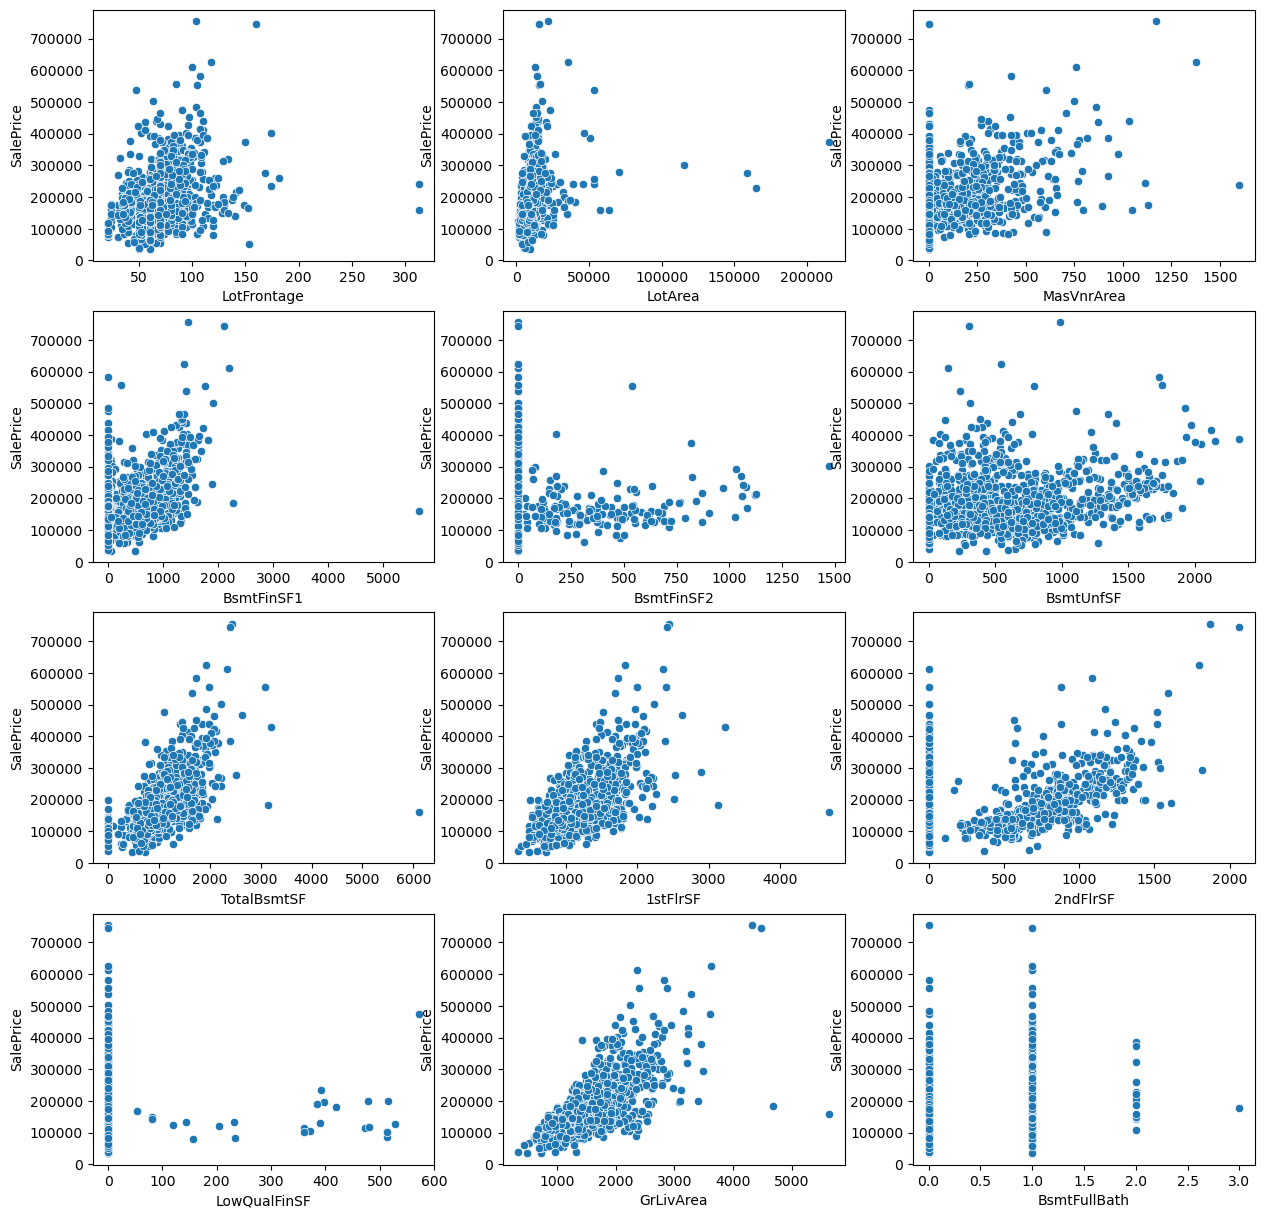

In [558]:
plt.figure()
fig1, ax = plt.subplots(4,3)
fig1.set_size_inches(15,15)
i=0
for var in numeric_cols[0:12]:
    r=int(i/3)
    c=int(i%3)
    sns.scatterplot(ax=ax[r][c],x=var,y='SalePrice',data=housing_enc)
    i=i+1
plt.show()

<Figure size 640x480 with 0 Axes>

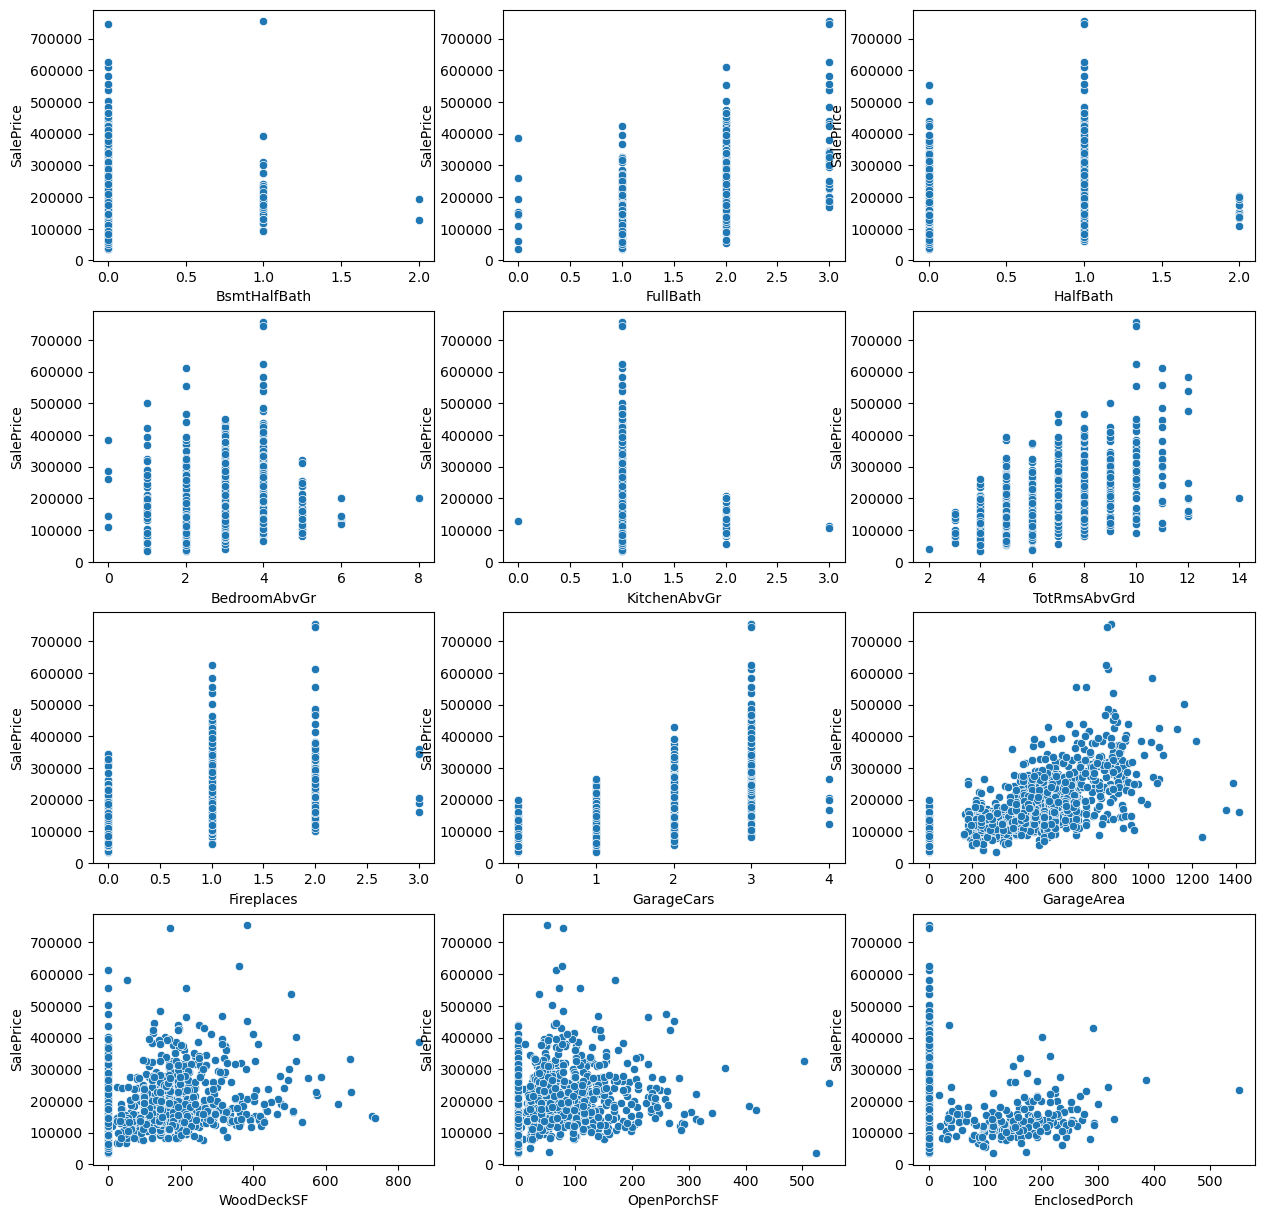

In [559]:
plt.figure()
fig1, ax = plt.subplots(4,3)
fig1.set_size_inches(15,15)
i=0
for var in numeric_cols[12:24]:
    r=int(i/3)
    c=int(i%3)
    sns.scatterplot(ax=ax[r][c],x=var,y='SalePrice',data=housing_enc)
    i=i+1
plt.show()

<Figure size 640x480 with 0 Axes>

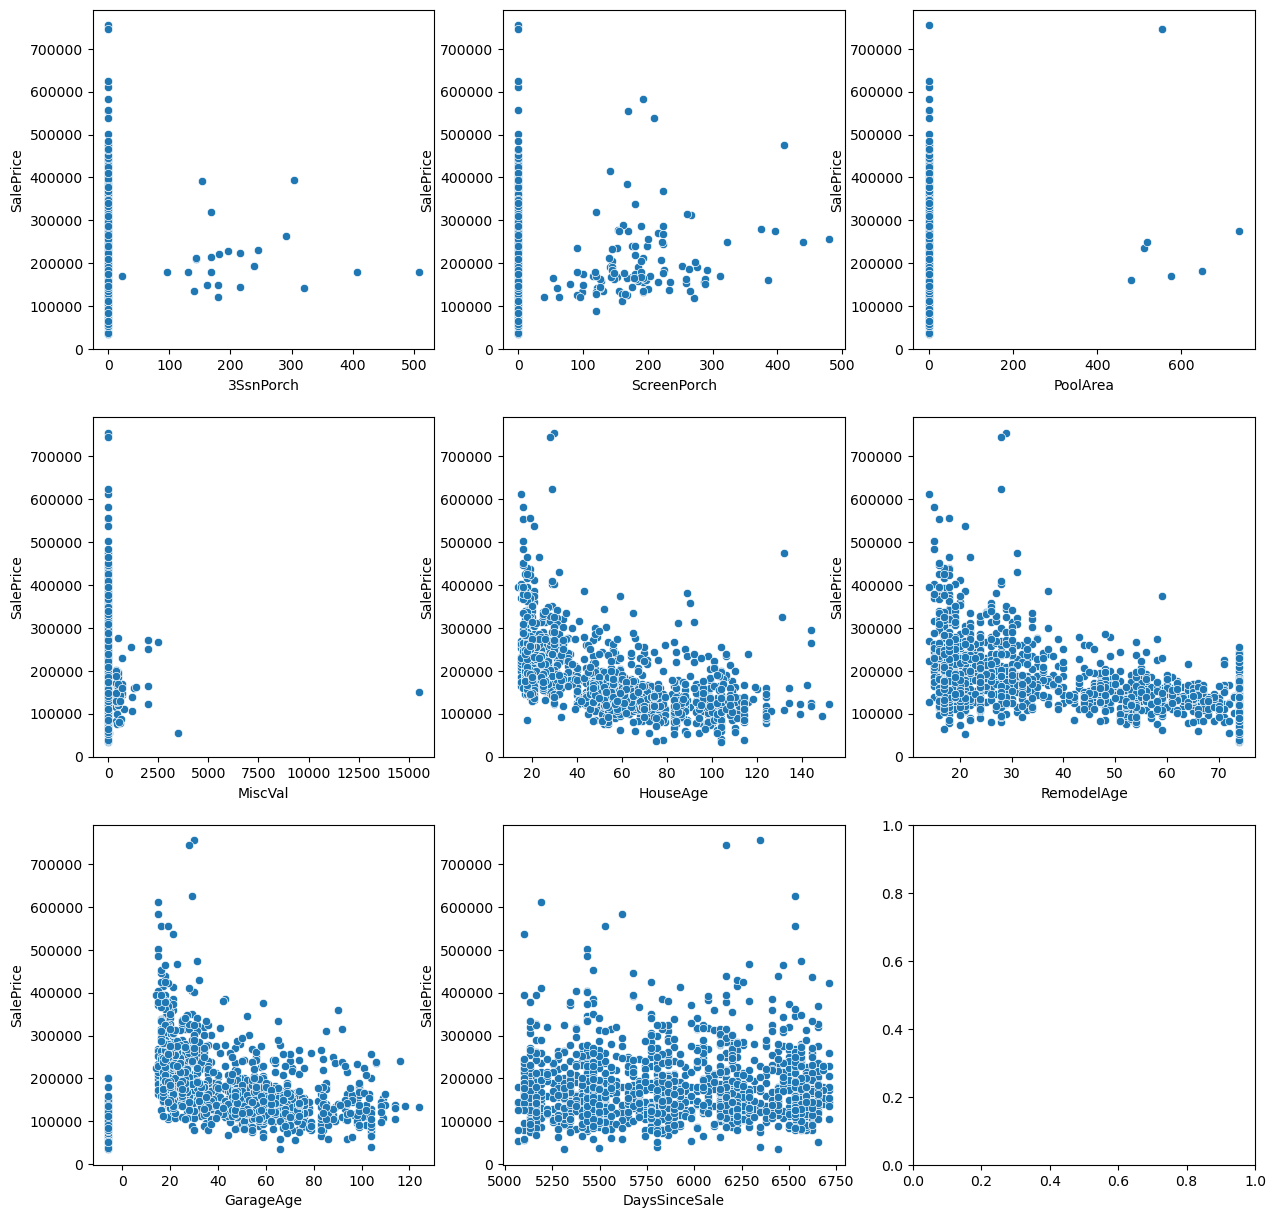

In [560]:
plt.figure()
fig1, ax = plt.subplots(3,3)
fig1.set_size_inches(15,15)
i=0
for var in numeric_cols[24:32]:
    r=int(i/3)
    c=int(i%3)
    sns.scatterplot(ax=ax[r][c],x=var,y='SalePrice',data=housing_enc)
    i=i+1
plt.show()

- From the above plots we see that the following features have a relation with the SalePrice
    - TotalBsmtSF
    - 1stFlrSF
    - GrLivArea
    - GarageArea
    - GarageAge
    - HouseAge

In [561]:
#Lets check the correlation matrix and heatmap between SalePrice and the above features
housing_num = housing_enc[['TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea','GarageAge','HouseAge','SalePrice']]
housing_num.corr()

,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,GarageAge,HouseAge,SalePrice
TotalBsmtSF,1.000000,0.822615,0.458392,0.484836,-0.208189,-0.391925,0.614771
1stFlrSF,0.822615,1.000000,0.567129,0.488980,-0.134956,-0.282184,0.605510
GrLivArea,0.458392,0.567129,1.000000,0.468967,-0.131869,-0.198015,0.709694
GarageArea,0.484836,0.488980,0.468967,1.000000,-0.189981,-0.478492,0.622798
GarageAge,-0.208189,-0.134956,-0.131869,-0.189981,1.000000,0.598064,-0.316387
HouseAge,-0.391925,-0.282184,-0.198015,-0.478492,0.598064,1.000000,-0.522388
SalePrice,0.614771,0.605510,0.709694,0.622798,-0.316387,-0.522388,1.000000


<Axes: >

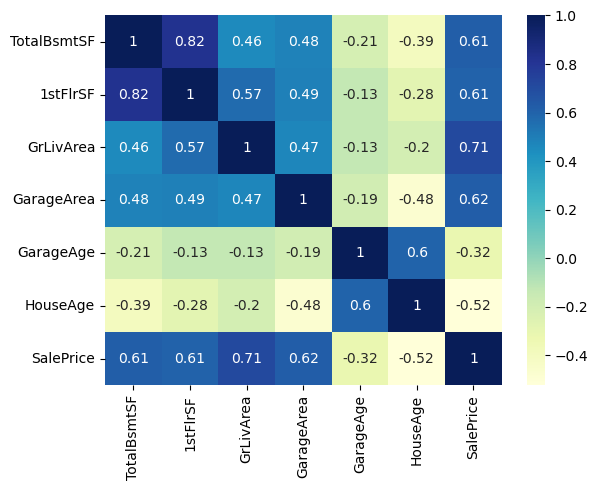

In [562]:
sns.heatmap(data=housing_num.corr(),cmap="YlGnBu",annot=True)

- Observations from above heatmap
    - The feature  GrLivArea shows a strong positive correlation with the SalePrice
    - The features TotalBsmtSF, 1stFlrSF, GarageArea exhibit a moderate positive correlation with the SalePrice
    - The features HouseAge and GarageAge show a moderate negative correlation with the SalePrice

#### Lets analyse the relation between ordinal categorical columns and the SalePrice

In [563]:
ordinal_cat_cols = ['LotShape','Utilities','LandSlope','ExterQual','ExterCond',
                    'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir',
                   'KitchenQual','Functional','GarageFinish','GarageQual','GarageCond','PavedDrive','OverallQual',
                    'OverallCond','FireplaceQu','PoolQC','Fence']

In [564]:
ordinal_cat_cols

['LotShape',
 'Utilities',
 'LandSlope',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'OverallQual',
 'OverallCond',
 'FireplaceQu',
 'PoolQC',
 'Fence']

In [565]:
len(ordinal_cat_cols)

23

<Figure size 640x480 with 0 Axes>

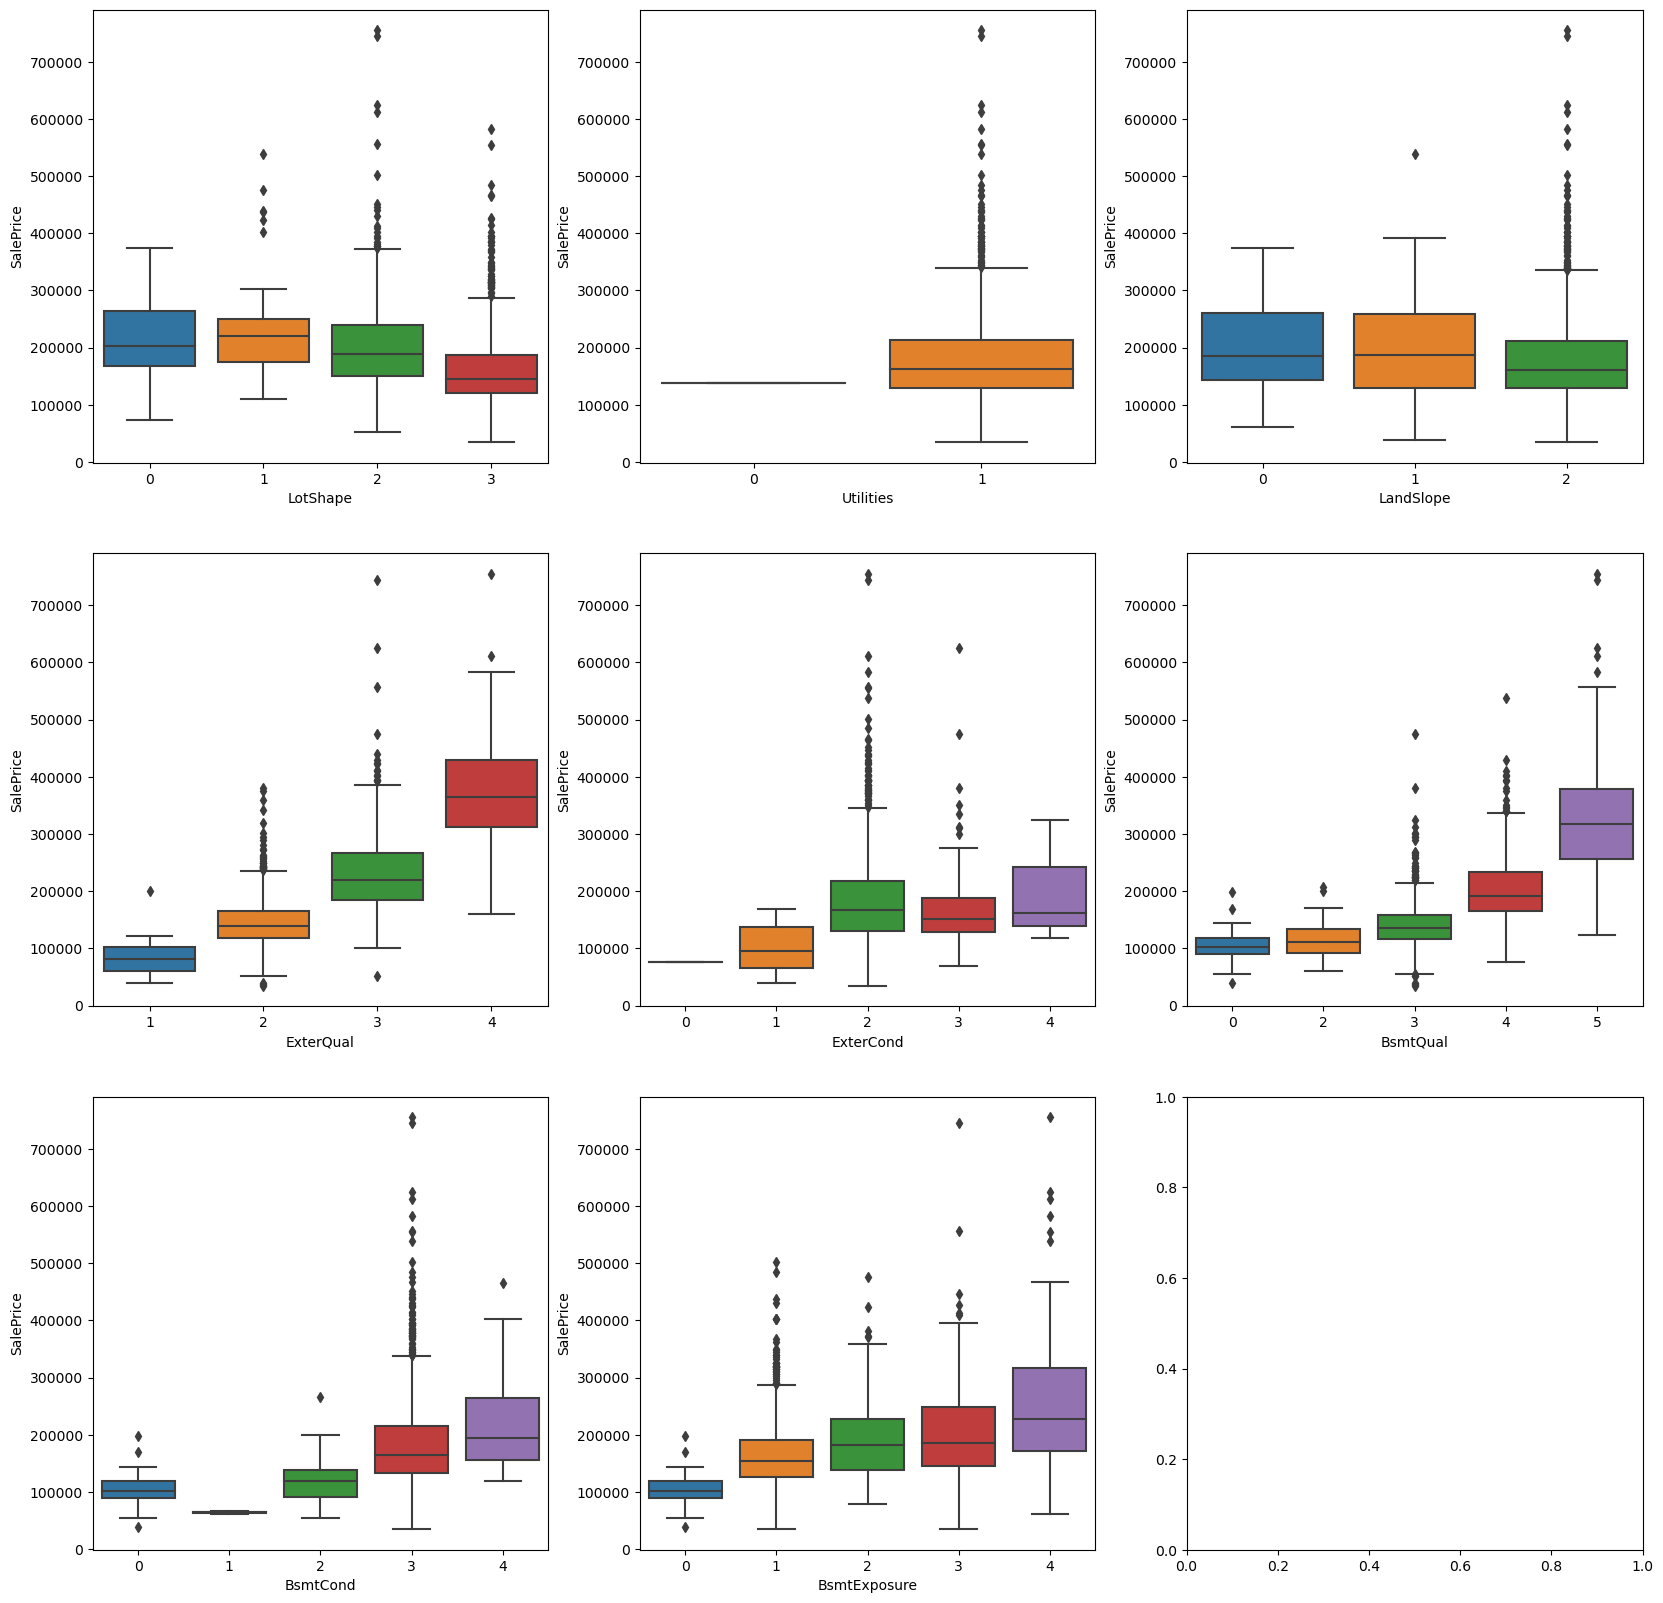

In [566]:
# For the ordinal categorical lets plot the box plots vs SalePrice
plt.figure()
fig1, ax = plt.subplots(3,3)
fig1.set_size_inches(20,20)
i=0
for var in ordinal_cat_cols[0:8]:
    r=int(i/3)
    c=int(i%3)
    sns.boxplot(ax=ax[r][c],x=var,y='SalePrice',data=housing_enc)
    i=i+1
plt.show()

<Figure size 640x480 with 0 Axes>

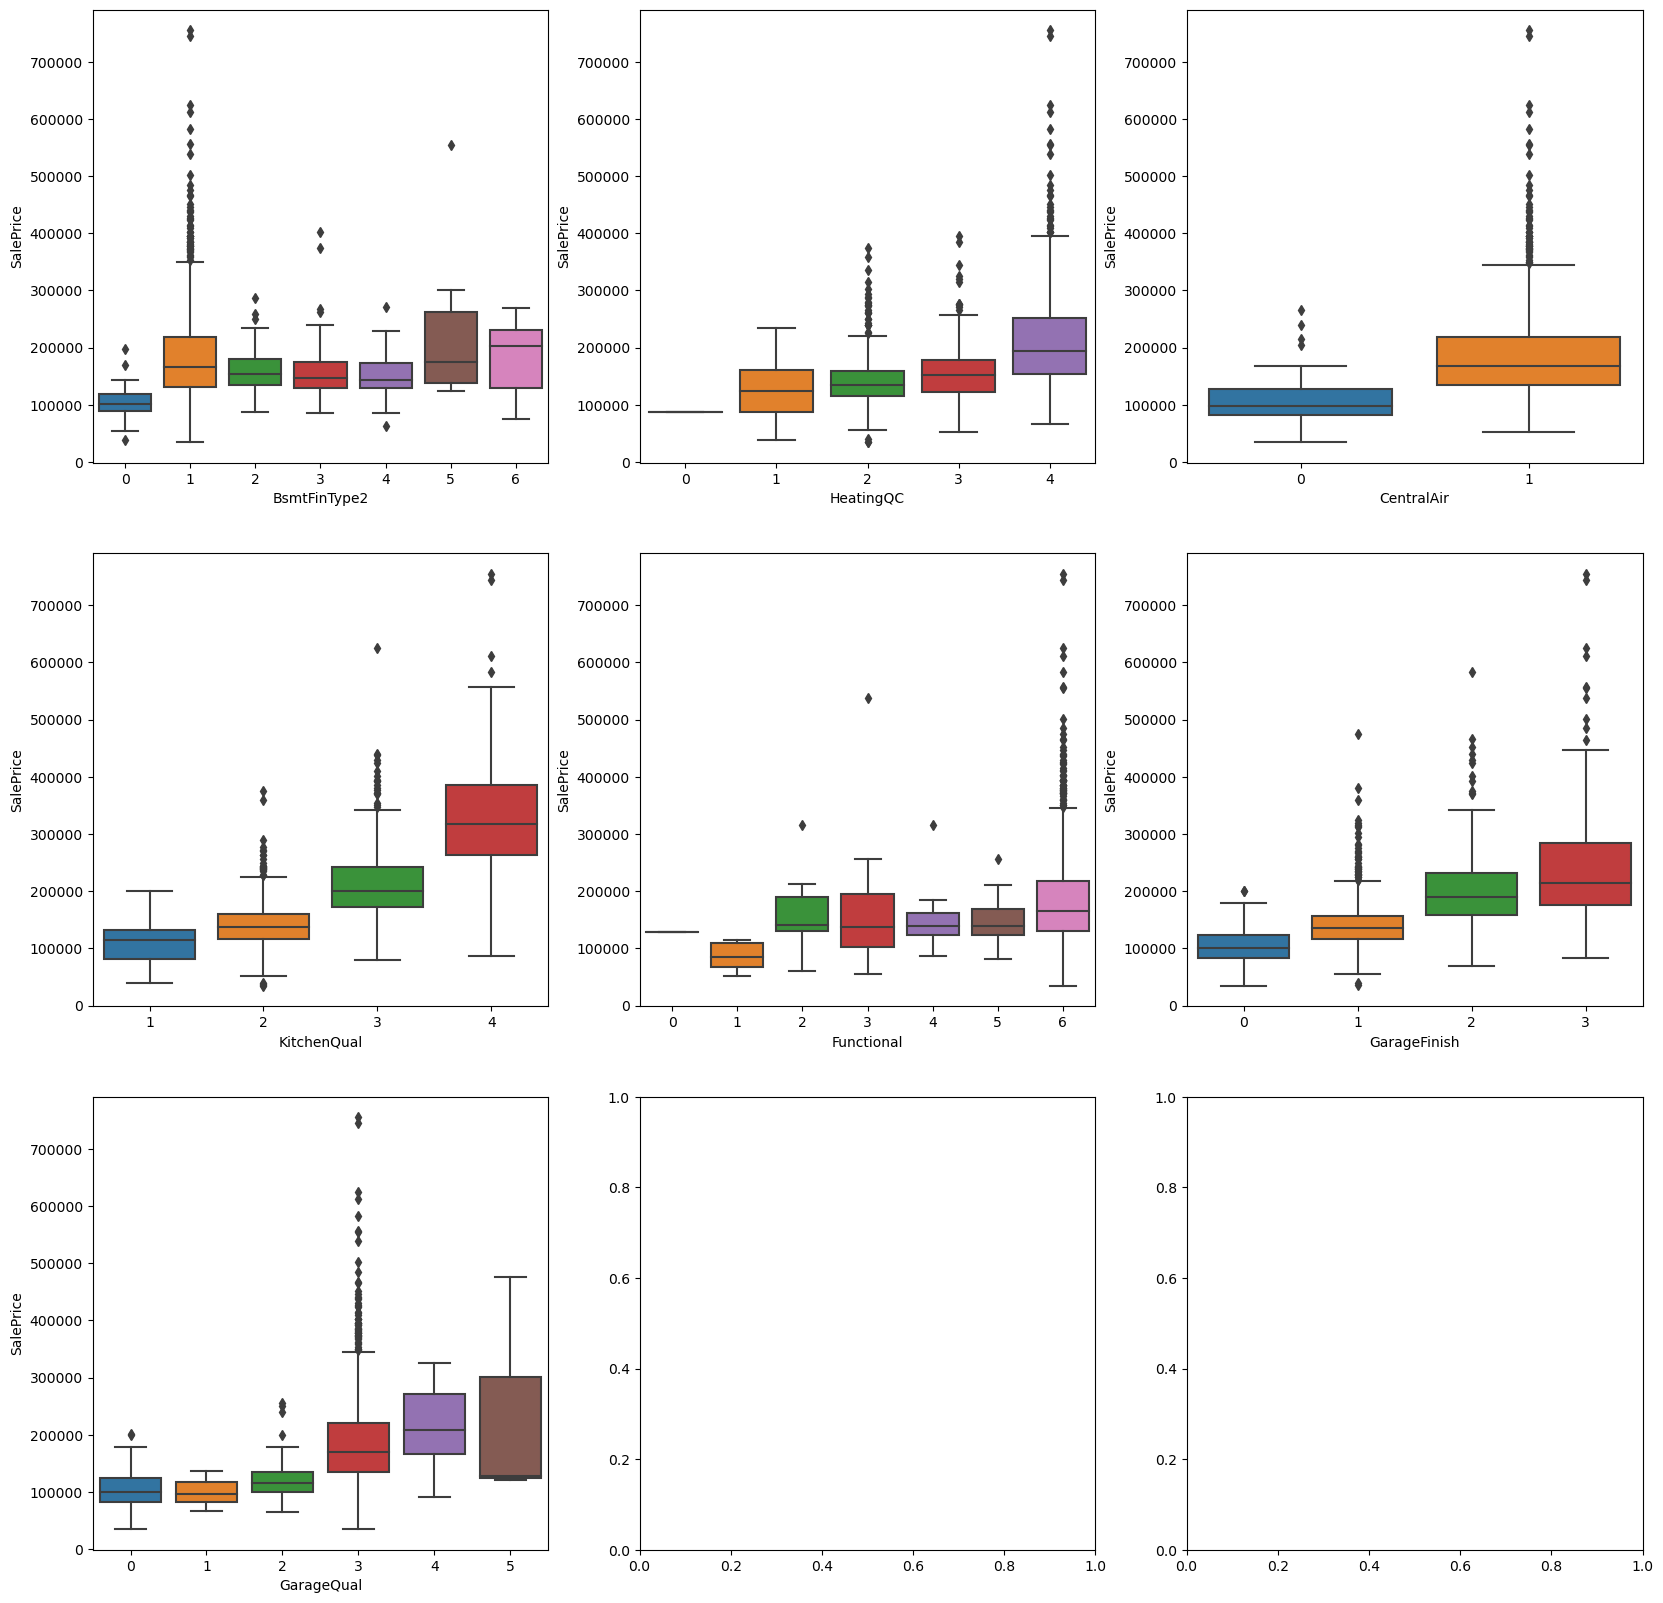

In [567]:
# For the ordinal categoricalcolumns lets plot the box plots vs SalePrice
plt.figure()
fig1, ax = plt.subplots(3,3)
fig1.set_size_inches(20,20)
i=0
for var in ordinal_cat_cols[9:16]:
    r=int(i/3)
    c=int(i%3)
    sns.boxplot(ax=ax[r][c],x=var,y='SalePrice',data=housing_enc)
    i=i+1
plt.show()

<Figure size 640x480 with 0 Axes>

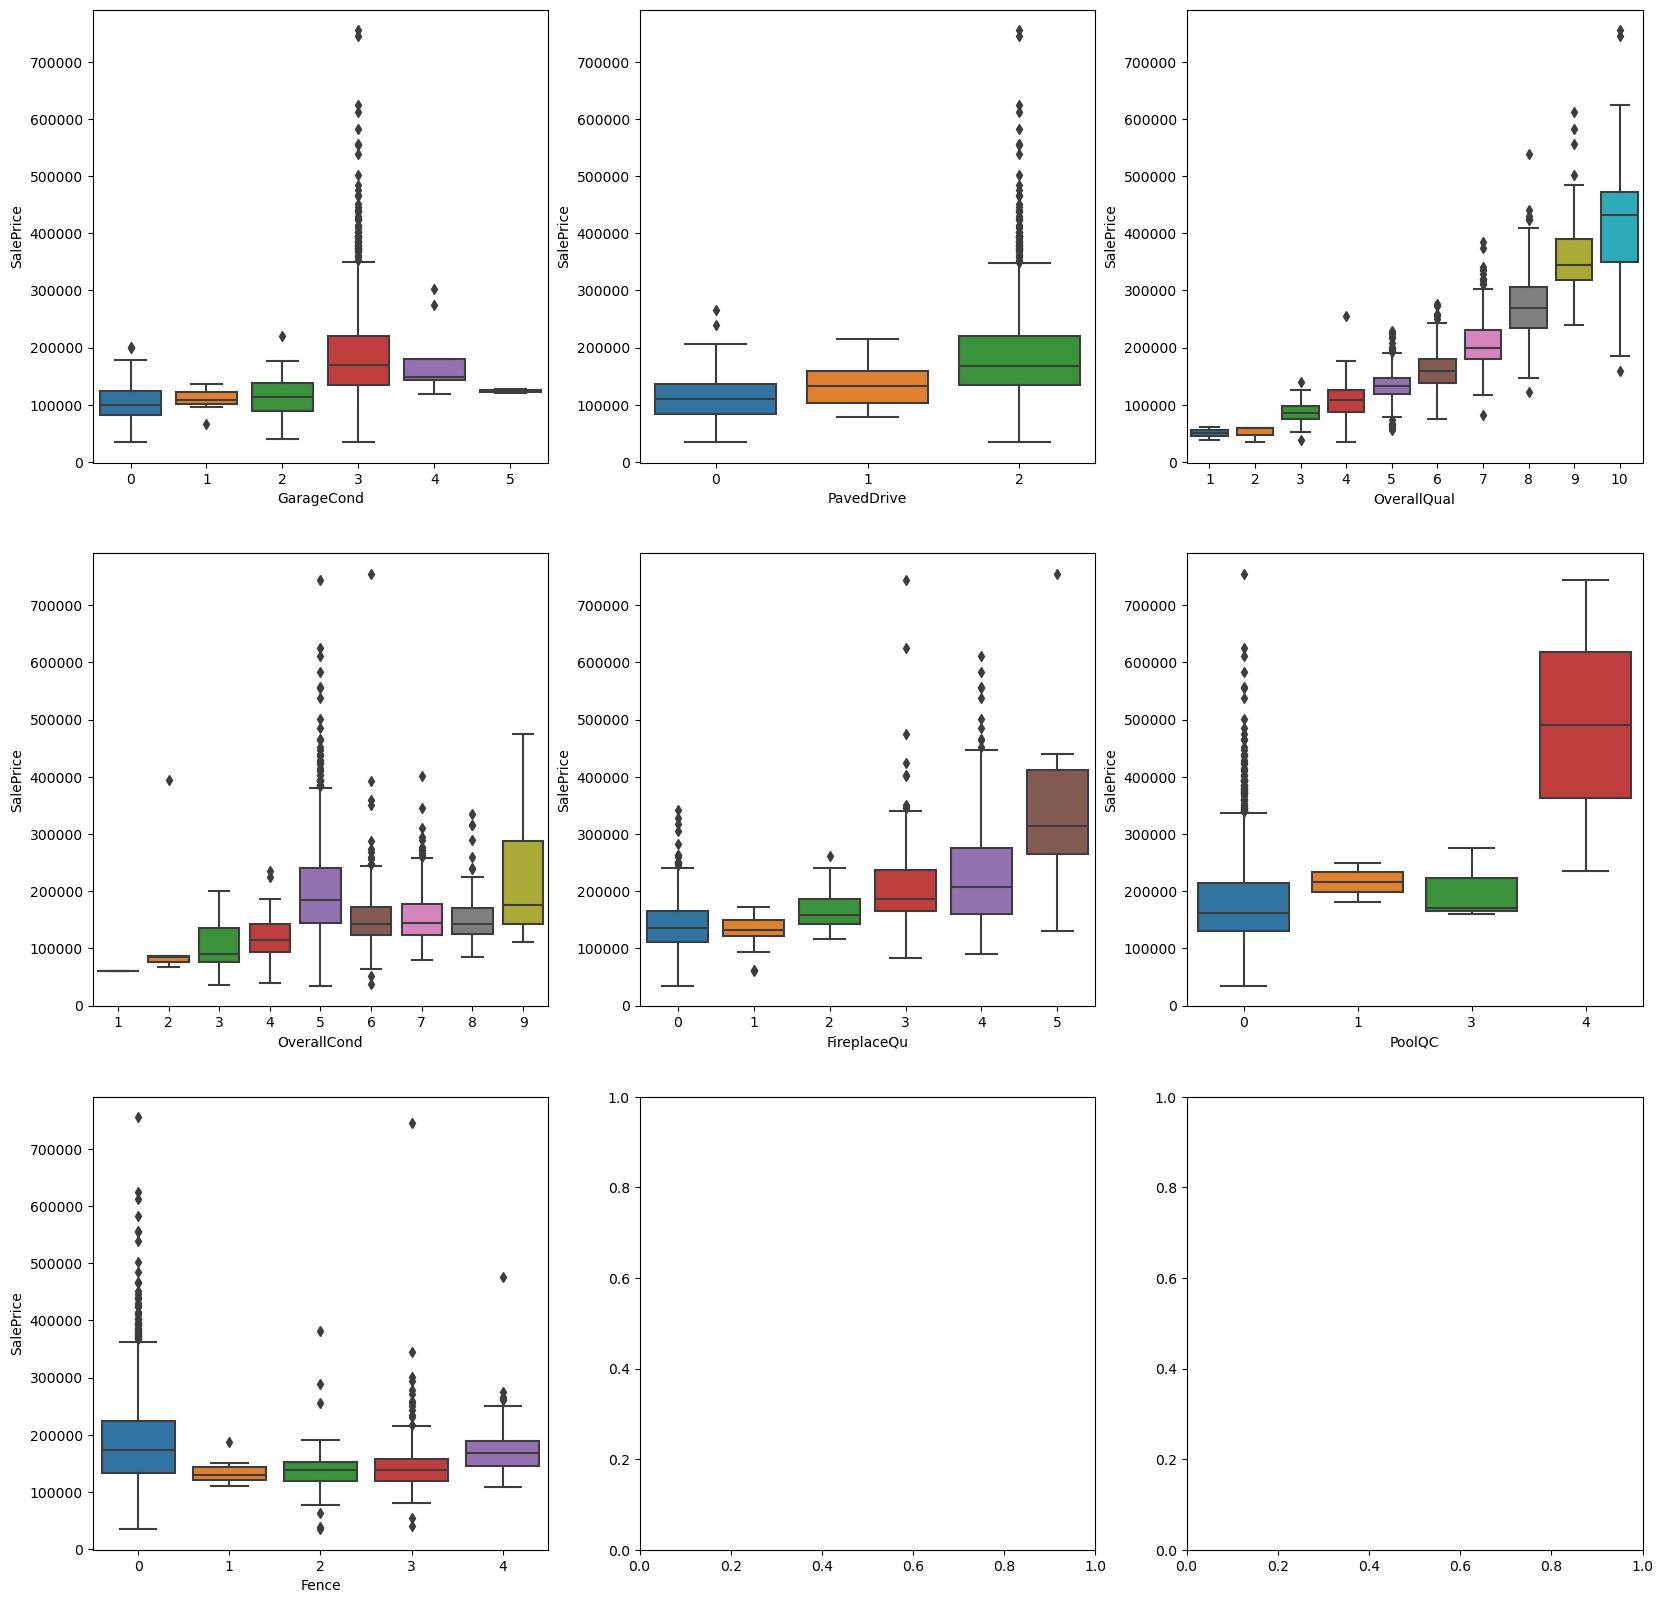

In [568]:
# For the ordinal categoricalcolumns lets plot the box plots vs SalePrice
plt.figure()
fig1, ax = plt.subplots(3,3)
fig1.set_size_inches(20,20)
i=0
for var in ordinal_cat_cols[16:23]:
    r=int(i/3)
    c=int(i%3)
    sns.boxplot(ax=ax[r][c],x=var,y='SalePrice',data=housing_enc)
    i=i+1
plt.show()

#### Observations from above plots
- The below features show an increasing trend of median SalePrice with an increase in the order of feature value
    - ExterQual
    - BsmtQual
    - BsmtCond
    - BsmtExposure
    - HeatingQC
    - KitchenQual
    - GarageFinish
    - PavedDrive
    - OverallQual
- Houses with Utilities have a higher median SalePrice
- Houses with Central Air Conditioning have a higher median SalePrice
- Increase in land slope severity shows a decline in the median SalePrice

## 4. Model building, evaluation & apply regularization

### Key Steps
#### 1. Split the data in train and test
#### 2. Perform scaling for numerical features
#### 3. Fit a base model on train data including all features
#### 4. Assess the accuracy for base model
#### 5. Apply ridge regression with CV
#### 6. Apply lasso regression with CV
#### 7. Check the assumptions of linear regression like normality of errors, linearity, homoscedasticity

#### <font color='blue'>4.1. Split the data in train and test</font>

In [569]:
housing_enc.head()

,Id,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,...,Heating_enc,Electrical_enc,GarageType_enc,SaleType_enc,SaleCondition_enc,MiscFeature_enc,HouseAge,RemodelAge,GarageAge,DaysSinceSale
0,1,65.0,8450,3,1,2,7,5,196.0,3,...,1,4,1,8,4,1,21,21,21,5952
1,2,80.0,9600,3,1,2,6,8,0.0,2,...,1,4,1,8,4,1,48,48,48,6228
2,3,68.0,11250,2,1,2,7,5,162.0,3,...,1,4,1,8,4,1,23,22,23,5739
3,4,60.0,9550,2,1,2,7,5,0.0,2,...,1,4,5,8,0,1,109,54,26,6682
4,5,84.0,14260,2,1,2,8,5,350.0,3,...,1,4,1,8,4,1,24,24,24,5648


In [570]:
housing_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1453 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1453 non-null   int64  
 1   LotFrontage        1453 non-null   float64
 2   LotArea            1453 non-null   int64  
 3   LotShape           1453 non-null   int64  
 4   Utilities          1453 non-null   int64  
 5   LandSlope          1453 non-null   int64  
 6   OverallQual        1453 non-null   int64  
 7   OverallCond        1453 non-null   int64  
 8   MasVnrArea         1453 non-null   float64
 9   ExterQual          1453 non-null   int64  
 10  ExterCond          1453 non-null   int64  
 11  BsmtQual           1453 non-null   int64  
 12  BsmtCond           1453 non-null   int64  
 13  BsmtExposure       1453 non-null   int64  
 14  BsmtFinType1       1453 non-null   int64  
 15  BsmtFinSF1         1453 non-null   int64  
 16  BsmtFinType2       1453 non-n

In [571]:
#1. Split the data into train and test
df_train, df_test = train_test_split(housing_enc, train_size=0.70, random_state=100)
print(df_train.shape)
print(df_test.shape)

(1017, 80)
(436, 80)


#### <font color='blue'>4.2. Perform scaling for numerical features</font>

In [572]:
features_to_scale = numeric_cols
features_to_scale.append("SalePrice")

In [573]:
# we will use the min max scaling
#instantiate an object
scaler = StandardScaler()

#fit the scaler on the data
df_train[features_to_scale] = scaler.fit_transform(df_train[features_to_scale])
df_train.head()

,Id,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,...,Heating_enc,Electrical_enc,GarageType_enc,SaleType_enc,SaleCondition_enc,MiscFeature_enc,HouseAge,RemodelAge,GarageAge,DaysSinceSale
851,852,0.007665,-0.710829,3,1,2,8,5,-0.356438,3,...,1,4,1,8,4,1,-1.010998,-0.851201,-0.807489,1.445683
25,26,1.855926,0.363450,3,1,2,8,5,2.926556,3,...,1,4,1,8,4,1,-1.143445,-1.047743,-0.957614,-0.960035
88,89,1.624477,-0.197348,2,1,2,3,2,-0.575304,1,...,1,4,6,3,0,1,1.902833,0.180647,-1.820828,-1.151328
1212,1213,-0.921458,-0.112645,3,1,2,4,6,-0.575304,2,...,1,4,1,8,4,1,1.041928,1.752987,1.519435,-1.024492
1164,1165,0.007665,0.551064,2,1,2,5,7,-0.575304,2,...,1,4,1,8,4,1,-0.183205,0.377190,0.130787,0.622291


In [574]:
#transform the test data
df_test[features_to_scale] = scaler.transform(df_test[features_to_scale])

In [575]:
X_train = df_train.drop('SalePrice', axis=1)
X_train.columns

Index(['Id', 'LotFrontage', 'LotArea', 'LotShape', 'Utilities', 'LandSlope',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscVal', 'MSSubClass_enc', 'MSZoning_enc', 'Street_enc',
       'Alley_enc', 'MasVnrType_enc', 'LandContour_enc', 'LotConfig_enc',
       'Neighborhood_enc', 'Condition1_enc', 'Condition2_enc', 'BldgType_enc',
       'Ho

In [576]:
X_train = df_train.drop('Id', axis=1)
X_train.columns

Index(['LotFrontage', 'LotArea', 'LotShape', 'Utilities', 'LandSlope',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscVal', 'SalePrice', 'MSSubClass_enc', 'MSZoning_enc',
       'Street_enc', 'Alley_enc', 'MasVnrType_enc', 'LandContour_enc',
       'LotConfig_enc', 'Neighborhood_enc', 'Condition1_enc', 'Condition2_enc',
       'BldgType_en

In [577]:
X_train.head()

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,...,Heating_enc,Electrical_enc,GarageType_enc,SaleType_enc,SaleCondition_enc,MiscFeature_enc,HouseAge,RemodelAge,GarageAge,DaysSinceSale
851,0.007665,-0.710829,3,1,2,8,5,-0.356438,3,2,...,1,4,1,8,4,1,-1.010998,-0.851201,-0.807489,1.445683
25,1.855926,0.363450,3,1,2,8,5,2.926556,3,2,...,1,4,1,8,4,1,-1.143445,-1.047743,-0.957614,-0.960035
88,1.624477,-0.197348,2,1,2,3,2,-0.575304,1,1,...,1,4,6,3,0,1,1.902833,0.180647,-1.820828,-1.151328
1212,-0.921458,-0.112645,3,1,2,4,6,-0.575304,2,2,...,1,4,1,8,4,1,1.041928,1.752987,1.519435,-1.024492
1164,0.007665,0.551064,2,1,2,5,7,-0.575304,2,2,...,1,4,1,8,4,1,-0.183205,0.377190,0.130787,0.622291


In [578]:
y_train = np.array(df_train['SalePrice']).reshape(-1,1)
y_train

array([[ 0.39610967],
       [ 0.9117471 ],
       [-1.22696213],
       ...,
       [ 0.08398048],
       [-0.91483294],
       [-0.15323771]])

In [579]:
X_test = df_test.drop('SalePrice', axis=1)
X_test.columns

Index(['Id', 'LotFrontage', 'LotArea', 'LotShape', 'Utilities', 'LandSlope',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscVal', 'MSSubClass_enc', 'MSZoning_enc', 'Street_enc',
       'Alley_enc', 'MasVnrType_enc', 'LandContour_enc', 'LotConfig_enc',
       'Neighborhood_enc', 'Condition1_enc', 'Condition2_enc', 'BldgType_enc',
       'Ho

In [580]:
X_test = df_test.drop('Id', axis=1)
X_test.columns

Index(['LotFrontage', 'LotArea', 'LotShape', 'Utilities', 'LandSlope',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscVal', 'SalePrice', 'MSSubClass_enc', 'MSZoning_enc',
       'Street_enc', 'Alley_enc', 'MasVnrType_enc', 'LandContour_enc',
       'LotConfig_enc', 'Neighborhood_enc', 'Condition1_enc', 'Condition2_enc',
       'BldgType_en

In [581]:
y_test = np.array(df_test['SalePrice']).reshape(-1,1)
y_test

array([[-0.72755542],
       [-0.78998126],
       [-1.45169515],
       [ 1.95675564],
       [ 0.77503452],
       [-0.22814871],
       [ 0.00906947],
       [-0.2718468 ],
       [-0.8524071 ],
       [-1.10211046],
       [-0.57149083],
       [-0.94604586],
       [-0.60270375],
       [ 1.98975394],
       [-0.36548556],
       [-1.53909133],
       [ 0.16513407],
       [-1.01471428],
       [-0.10329704],
       [-0.25311905],
       [-1.0609094 ],
       [-0.49033724],
       [-0.53778087],
       [-0.35300039],
       [ 0.271258  ],
       [-0.0408712 ],
       [ 0.47102068],
       [ 0.39610967],
       [-1.01471428],
       [-0.15323771],
       [-0.78373868],
       [ 0.271258  ],
       [ 0.83309055],
       [-0.64015925],
       [-1.78879468],
       [ 0.15889149],
       [-0.44039657],
       [-0.5028224 ],
       [ 0.15889149],
       [ 0.30247092],
       [-0.09081187],
       [-0.54152642],
       [ 0.02155464],
       [ 0.17137665],
       [ 0.62371428],
       [-0

#### <font color='blue'>4.3. Fit a base model on train data including all features</font>

In [582]:
# Create an instance of Linear Regression
LR = LinearRegression()

# Fit the model on the training data
LR.fit(X_train, y_train)

# Predict on the testing data
y_pred = LR.predict(X_test)

#### <font color='blue'>4.4. Assess the accuracy for base model</font>

In [583]:
# Metrics to give an overall sense of error in the model
rss = np.sum(np.square(y_test - y_pred))
print("RSS: ",rss)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ",mse)
rmse = mse**0.5
print("RMSE: ",rmse)

RSS:  3.8803128405887175e-06
MSE:  8.899800093093389e-09
RMSE:  9.433875181013043e-05


In [584]:
# Find the value of r squared
r2_score(y_test , y_pred) 

0.9999999905850185

In [585]:
comp_df = pd.concat([pd.DataFrame(y_test), pd.DataFrame(y_pred)], axis=1)
comp_df

,0,0
0,-0.727555,-0.727555
1,-0.789981,-0.789981
2,-1.451695,-1.451695
3,1.956756,1.956756
4,0.775035,0.775035
...,...,...
431,0.358654,0.358654
432,-0.303060,-0.303060
433,-1.258175,-1.258175
434,1.707052,1.707052


#### Lets check the summary of the base LR model using statsmodel 

In [586]:
X_train_lm = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train_lm).fit()  #Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.618e+29
Date:                Sun, 19 May 2024   Prob (F-statistic):               0.00
Time:                        14:53:54   Log-Likelihood:                 32266.
No. Observations:                1017   AIC:                        -6.438e+04
Df Residuals:                     940   BIC:                        -6.400e+04
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
LotFrontage        1.076e-16   1.92e-16      0.560      0.576   -2.69e-16    4.85e-16
LotArea           -2.082e-17   1.78e-16     -0.117      0.907    -3.7e-16    3.28e-16
LotShape           3.018e-16   2.76e-16      1.094      0.274    -2.4e-16    8.43e-16
Utilities         -5.107e-15   4.13e-15     -1.235      0.217   -1.32e-14    3.01e-15
LandSlope          6.661e-16   6.58e-16      1.012      0.312   -6.25e-16    1.96e-15
OverallQual        9.368e-17   1.99e-16      0.472      0.637   -2.96e-16    4.83e-16
OverallCond        4.857e-17   1.79e-16      0.272      0.786   -3.02e-16    3.99e-16
MasVnrArea         1.453e-16   1.77e-16      0.821      0.412   -2.02e-16    4.92e-16
ExterQual          8.483e-16   4.16e-16      2.039      0.042     3.2e-17    1.66e-15
ExterCond          2.186e-16   4.32e-16      0.506      0.613    -6.3e-16    1.07e-15
BsmtQual          -9.714e-17   3.37e-16     -0.289      0.773   -7.58e-16    5.63e-16
BsmtCond                   0    4.1e-16          0      1.000   -8.05e-16    8.05e-16
BsmtExposure       6.939e-18   1.67e-16      0.042      0.967   -3.21e-16    3.35e-16
BsmtFinType1       2.845e-16   1.03e-16      2.774      0.006    8.32e-17    4.86e-16
BsmtFinSF1        -1.547e-15   1.91e-16     -8.083      0.000   -1.92e-15   -1.17e-15
BsmtFinType2      -1.145e-16   2.54e-16     -0.451      0.652   -6.12e-16    3.83e-16
BsmtFinSF2        -5.794e-16   2.32e-16     -2.494      0.013   -1.04e-15   -1.24e-16
BsmtUnfSF         -1.828e-15   1.67e-16    -10.981      0.000   -2.16e-15    -1.5e-15
TotalBsmtSF        1.874e-15   2.63e-16      7.123      0.000    1.36e-15    2.39e-15
HeatingQC          3.018e-16   1.91e-16      1.577      0.115   -7.39e-17    6.78e-16
CentralAir        -9.714e-17    7.2e-16     -0.135      0.893   -1.51e-15    1.32e-15
1stFlrSF           2.054e-15   2.76e-16      7.452      0.000    1.51e-15    2.59e-15
2ndFlrSF           2.345e-15    2.2e-16     10.645      0.000    1.91e-15    2.78e-15
LowQualFinSF       1.457e-16   1.46e-16      0.997      0.319   -1.41e-16    4.33e-16
GrLivArea         -3.081e-15   2.24e-16    -13.771      0.000   -3.52e-15   -2.64e-15
BsmtFullBath       2.776e-17   2.12e-16      0.131      0.896   -3.89e-16    4.44e-16
BsmtHalfBath       2.255e-17   1.44e-16      0.156      0.876   -2.61e-16    3.06e-16
FullBath          -6.245e-17   2.37e-16     -0.263      0.792   -5.28e-16    4.03e-16
HalfBath           3.123e-17   2.07e-16      0.151      0.880   -3.75e-16    4.37e-16
BedroomAbvGr       2.212e-16    2.1e-16      1.051      0.293   -1.92e-16    6.34e-16
KitchenAbvGr       5.725e-17   1.85e-16      0.310      0.757   -3.05e-16     4.2e-16
KitchenQual       -6.939e-17   3.34e-16     -0.208      0.835   -7.25e-16    5.86e-16
TotRmsAbvGrd       6.939e-17    3.1e-16      0.223      0.823    -5.4e-16

#### <font color='blue'>4.5. Apply Ridge Regression with CV</font>

In [166]:
# Define the number of folds for CV
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=22)

In [167]:
# Define a range of lambda values
lambda_values = [0.001,0.01, 0.1, 1, 10, 100]

In [168]:
# Apply Ridge Regression with cross-validation for each lambda value
for alpha in lambda_values:
    ridge = Ridge(alpha=alpha)
    # Perform k-fold cross-validation and compute the mean score
    scores = cross_val_score(ridge, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    mean_score = np.mean(scores)
    print("Lambda: ", alpha, "Mean MSE: " ,(-mean_score), "RMSE: ", (-mean_score)**0.5)

Lambda:  0.001 Mean MSE:  2.611281366210439e-11 RMSE:  5.110069829474387e-06
Lambda:  0.01 Mean MSE:  2.610381836641584e-09 RMSE:  5.1091895997717524e-05
Lambda:  0.1 Mean MSE:  2.601678258156149e-07 RMSE:  0.0005100664915632224
Lambda:  1 Mean MSE:  2.527843453908365e-05 RMSE:  0.005027766356851087
Lambda:  10 Mean MSE:  0.0019976207138416163 RMSE:  0.044694750405854335
Lambda:  100 Mean MSE:  0.04960722370750174 RMSE:  0.22272679162485534


#### Lowest RMSE we get is for value of Lambda = 0.001
#### Lets check for values of Lambda between 0.0001 and 0.001

In [169]:
# Define a range of lambda values
lambda_values = [0.0001,0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009]
# Apply Ridge Regression with cross-validation for each lambda value
for alpha in lambda_values:
    ridge = Ridge(alpha=alpha)
    # Perform k-fold cross-validation and compute the mean score
    scores = cross_val_score(ridge, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    mean_score = np.mean(scores)
    print("Lambda: ", alpha, "Mean MSE: " ,(-mean_score), "RMSE: ", (-mean_score)**0.5)

Lambda:  0.0001 Mean MSE:  2.6113716577823967e-13 RMSE:  5.110158175421184e-07
Lambda:  0.0002 Mean MSE:  1.044544645470328e-12 RMSE:  1.0220296695646013e-06
Lambda:  0.0003 Mean MSE:  2.3502164260577673e-12 RMSE:  1.5330415604469983e-06
Lambda:  0.0004 Mean MSE:  4.178146477306781e-12 RMSE:  2.044051485972597e-06
Lambda:  0.0005 Mean MSE:  6.5283287868893816e-12 RMSE:  2.5550594487974995e-06
Lambda:  0.0006 Mean MSE:  9.400757347177857e-12 RMSE:  3.066065450569811e-06
Lambda:  0.0007 Mean MSE:  1.2795426122281951e-11 RMSE:  3.5770694880421254e-06
Lambda:  0.0008 Mean MSE:  1.6712329114828634e-11 RMSE:  4.088071564298824e-06
Lambda:  0.0009 Mean MSE:  2.1151460300494976e-11 RMSE:  4.599071678121029e-06


#### Lambda of 10 still gives best RMSE
#### Lets check for values of Lambda between 10 and 100

In [118]:
# Define a range of lambda values
lambda_values = [10,20,30,40,50,60,70,80,90]
# Apply Ridge Regression with cross-validation for each lambda value
for alpha in lambda_values:
    ridge = Ridge(alpha=alpha)
    # Perform k-fold cross-validation and compute the mean score
    scores = cross_val_score(ridge, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    mean_score = np.mean(scores)
    print("Lambda: ", alpha, "Mean MSE: " ,(-mean_score), "RMSE: ", (-mean_score)**0.5)

Lambda:  10 Mean MSE:  0.002873810734038585 RMSE:  0.05360793536444568
Lambda:  20 Mean MSE:  0.002845766290923188 RMSE:  0.05334572420469318
Lambda:  30 Mean MSE:  0.0028702657016837344 RMSE:  0.053574860724818825
Lambda:  40 Mean MSE:  0.002905453384645355 RMSE:  0.05390225769525202
Lambda:  50 Mean MSE:  0.0029419274241447913 RMSE:  0.054239537462489405
Lambda:  60 Mean MSE:  0.00297691045535555 RMSE:  0.05456107087801292
Lambda:  70 Mean MSE:  0.00300961371157647 RMSE:  0.05485994633224198
Lambda:  80 Mean MSE:  0.0030399398988269263 RMSE:  0.0551356499809962
Lambda:  90 Mean MSE:  0.0030680383624658537 RMSE:  0.05538987599251197


#### Lambda value of 20 gives a slightly better RMSE than value of 10. So we choose 20 as the optimal value of lambda for ridge regression

#### <font color='blue'>4.6. Apply Lasso Regression with CV</font>

In [120]:
# Define a range of lambda values
lambda_values = [0.001,0.01, 0.1, 1, 10, 100]
# Apply Ridge Regression with cross-validation for each lambda value
for alpha in lambda_values:
    lasso = Lasso(alpha=alpha)
    # Perform k-fold cross-validation and compute the mean score
    scores = cross_val_score(lasso, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    mean_score = np.mean(scores)
    print("Lambda: ", alpha, "Mean MSE: " ,(-mean_score), "RMSE: ", (-mean_score)**0.5)

Lambda:  0.001 Mean MSE:  0.002909848791880518 RMSE:  0.053943014301024356
Lambda:  0.01 Mean MSE:  0.004295582860491386 RMSE:  0.06554069621610215
Lambda:  0.1 Mean MSE:  0.01066342147242054 RMSE:  0.10326384397464845
Lambda:  1 Mean MSE:  0.012312467627341433 RMSE:  0.11096155923265243
Lambda:  10 Mean MSE:  0.012311823907434905 RMSE:  0.11095865855098873
Lambda:  100 Mean MSE:  0.012311823907434905 RMSE:  0.11095865855098873


#### Lowest RMSE we get is for value of Lambda = 0.001
#### Lets check for Lambda values between 0.0001 and 0.001

In [121]:
# Define a range of lambda values
lambda_values = [0.0001,0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009]
# Apply Ridge Regression with cross-validation for each lambda value
for alpha in lambda_values:
    lasso = Lasso(alpha=alpha)
    # Perform k-fold cross-validation and compute the mean score
    scores = cross_val_score(lasso, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    mean_score = np.mean(scores)
    print("Lambda: ", alpha, "Mean MSE: " ,(-mean_score), "RMSE: ", (-mean_score)**0.5)

Lambda:  0.0001 Mean MSE:  0.003532015221385125 RMSE:  0.059430759892374965
Lambda:  0.0002 Mean MSE:  0.003221647718289673 RMSE:  0.05675956058929344
Lambda:  0.0003 Mean MSE:  0.003024301129365123 RMSE:  0.05499364626359233
Lambda:  0.0004 Mean MSE:  0.002930516110790605 RMSE:  0.05413424157398536
Lambda:  0.0005 Mean MSE:  0.002896239516697615 RMSE:  0.05381672153427422
Lambda:  0.0006 Mean MSE:  0.0028757460930163687 RMSE:  0.05362598337575143
Lambda:  0.0007 Mean MSE:  0.00287419771957246 RMSE:  0.05361154464826079
Lambda:  0.0008 Mean MSE:  0.0028859866714430298 RMSE:  0.05372138002176628
Lambda:  0.0009 Mean MSE:  0.002896296997336523 RMSE:  0.05381725557232107


#### Lowest RMSE is reported for the value of Lambda = 0.0007. We choose this as the optimal value of Lambda for Lasso regression

#### <font color='blue'>4.7. Compare accuracy of model using Ridge and Lasso</font>

In [122]:
#Apply Ridge for optimal Lambda value of 10
RidgeReg = Ridge(alpha = 20) # Initialize the Ridge Regression model with a specific lambda
RidgeReg.fit(X_train, y_train) # fit the model on the data
print(RidgeReg.feature_names_in_)
print(RidgeReg.coef_)
y_pred = RidgeReg.predict(X_test)
print("R2 score = " + str(r2_score(y_test, y_pred)))


['Id' 'LotFrontage' 'LotArea' 'LotShape' 'Utilities' 'LandSlope'
 'OverallQual' 'OverallCond' 'MasVnrArea' 'ExterQual' 'ExterCond'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinSF1'
 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF' 'HeatingQC'
 'CentralAir' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF' 'GrLivArea'
 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath' 'BedroomAbvGr'
 'KitchenAbvGr' 'KitchenQual' 'TotRmsAbvGrd' 'Functional' 'Fireplaces'
 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual' 'GarageCond'
 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch'
 'ScreenPorch' 'PoolArea' 'MiscVal' 'MSSubClass_enc' 'MSZoning_enc'
 'Street_enc' 'LandContour_enc' 'LotConfig_enc' 'Neighborhood_enc'
 'Condition1_enc' 'Condition2_enc' 'BldgType_enc' 'HouseStyle_enc'
 'RoofStyle_enc' 'RoofMatl_enc' 'Exterior1st_enc' 'Exterior2nd_enc'
 'Foundation_enc' 'Heating_enc' 'Electrical_enc' 'GarageType_enc'
 'SaleType_enc' 'SaleCondition_enc' 'HouseAge' 'RemodelAge' '

In [123]:
#Apply Lasso for optimal Lambda value of 0.001
LassoReg = Lasso(alpha = 0.0007) # Initialize the Lasso Regression model with a specific lambda
LassoReg.fit(X_train, y_train) # fit the model on the polynomial features
print(LassoReg.feature_names_in_)
print(LassoReg.coef_)
y_pred = LassoReg.predict(X_test)
print("R2 score = " + str(r2_score(y_test, y_pred)))


['Id' 'LotFrontage' 'LotArea' 'LotShape' 'Utilities' 'LandSlope'
 'OverallQual' 'OverallCond' 'MasVnrArea' 'ExterQual' 'ExterCond'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinSF1'
 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF' 'HeatingQC'
 'CentralAir' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF' 'GrLivArea'
 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath' 'BedroomAbvGr'
 'KitchenAbvGr' 'KitchenQual' 'TotRmsAbvGrd' 'Functional' 'Fireplaces'
 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual' 'GarageCond'
 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch'
 'ScreenPorch' 'PoolArea' 'MiscVal' 'MSSubClass_enc' 'MSZoning_enc'
 'Street_enc' 'LandContour_enc' 'LotConfig_enc' 'Neighborhood_enc'
 'Condition1_enc' 'Condition2_enc' 'BldgType_enc' 'HouseStyle_enc'
 'RoofStyle_enc' 'RoofMatl_enc' 'Exterior1st_enc' 'Exterior2nd_enc'
 'Foundation_enc' 'Heating_enc' 'Electrical_enc' 'GarageType_enc'
 'SaleType_enc' 'SaleCondition_enc' 'HouseAge' 'RemodelAge' '